# Avocado Prices Analysis
by Mercy Nyambura Kariuki

# Introduction
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… If a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

## Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the <a href="https://hassavocadoboard.com/" target="_blank" rel="noreferrer noopener">Hass Avocado Board describes the data on their website</a>:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

> - Date - The date of the observation
> - AveragePrice - the average price of a single avocado
> - type - conventional or organic
> - year - the year sold
> - Region - the city or region of the observation
> - Total Volume - Total number of avocados sold
> - 4046 - Total number of avocados with Product Lookup codes (PLU's) 4046 sold
> - 4225 - Total number of avocados with Product Lookup codes (PLU's) 4225 sold
> - 4770 - Total number of avocados with Product Lookup codes (PLU's) 4770 sold

**Acknowledgements**

Many thanks to the <a href="=http://www.hassavocadoboard.com/retail/volume-and-price-data">Hass Avocado Board</a> for sharing this data!!

**Inspiration**

***In which cities can millenials have their avocado toast AND buy a home?***

***Was the Avocadopocalypse of 2017 real?***

<li><a href="#DataAquisition">1. Data Aquisition</a></li>
<li><a href="#DataPreprocessing">2. Data Preprocessing</a></li>
<li><a href="#3. ExploratoryDataAnalysis">3. ExploratoryDataAnalysis</a></li>
<!-- <li><a href="#PortraitOfTheUserOfEachRegion">4. Portrait of the user of each region</a></li> -->
<!-- <li><a href="#ResearchOfStatisticalIndicators">5. Research of statistical indicators</a></li> 
<li><a href="HypothesisTesting">5. Hypothesis Testing</a></li> -->
<li><a href="ResearchResults">4. Research Results</a></li>

In [117]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar
import plotly.graph_objs as go
import matplotlib.dates as mdates
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

> ## Gather Data

In [2]:
avocado=pd.read_csv("C:/Users/kariu/OneDrive/Desktop/Data Science/Google_Capstone_Project/Choose Your Own Dataset/Avocado Prices/avocado.csv")

In [3]:
#reas the first 5 rows of the dataset
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
# getting general information about the data in the sales table
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


> **Let's take a closer look at the information received.**

There are 14 columns in the table. There are three data types: non-null object (3 columns), non-null float64 (9 columns) and non-null int64 (2 columns).



# Stage 2: Data Preprocessing

In [5]:
avocado.isnull().sum().sum()

0

In [6]:
avocado.duplicated().sum()

0

In [7]:
avocado.shape

(18249, 14)

In [8]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
avocado.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
avocado.sample()

Date  AveragePrice  Total Volume  4046     4225  4770  \
15982  2017-07-30          1.56       4666.42   0.0  1153.38   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
15982     3513.04     1403.33     2109.71          0.0  organic  2017   

           region  
15982  Louisville

In [11]:
avocado.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [12]:
avocado.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [13]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
avocado.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [15]:
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

>**There are two types of avocados sold:**
>- conventional
> - organic

> These sales are a record from the year 2015 - 2018 among 54 regions.

### Let's split the `Date` Column

In [16]:
#convert Date column to date-time data type
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['month'] = avocado['Date'].dt.month
avocado['day'] = avocado['Date'].dt.day
avocado.sample(3)

Date  AveragePrice  Total Volume       4046     4225    4770  \
3899  2016-01-03          1.09     148599.47  103296.40  8714.57  487.53   
14726 2016-04-10          1.31      21561.29    3204.95  7746.53  111.55   
9152  2015-06-28          2.02       1200.61      22.35   124.70    0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
3899     36100.97    20713.33    15387.64          0.0  conventional  2016   
14726    10498.26     8558.96     1939.30          0.0       organic  2016   
9152      1053.56     1053.56        0.00          0.0       organic  2015   

                 region  month  day  
3899       Jacksonville      1    3  
14726  WestTexNewMexico      4   10  
9152             Albany      6   28

# Stage 3. Exploratory data analysis

In [17]:
avocado.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193   
4046            0.920057    0.925280    0.838645     0.699377  0.003353   
4225            0.905787    0.916031    0.810015     0.688809 -0.009559   
4770            0.792314    0.802733    0.698471     0.679861 -0.036531   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033   
year            0.071552    0.063915    0.087891     0.081033  1.000000   
month          -0.022724   -0.023126   -0.020187    -0.012969 -0.177050   
day            -0.004988   -0.003870   -0.008352     0.000319  0.004475   

                 month       day  
AveragePrice  0.162409  0.027386  
Total Volume -0.024689 -0.009747  
4046         -0.025803 -0.010159  
4225         -0.022108 -0.012393  
4770         -0.033424 -0.009009  
Total Bags   -0.022724 -0.004988  
Small Bags   -0.023126 -0.003870  
Large Bags   -0.020187 -0.008352  
XLarge Bags  -0.012969  0.000319  
year         -0.177050  0.004475  
month         1.000000  0.010621  
day           0.010621  1.000000

> **Let's Visualize these correlations**

<Figure size 1440x1080 with 0 Axes>

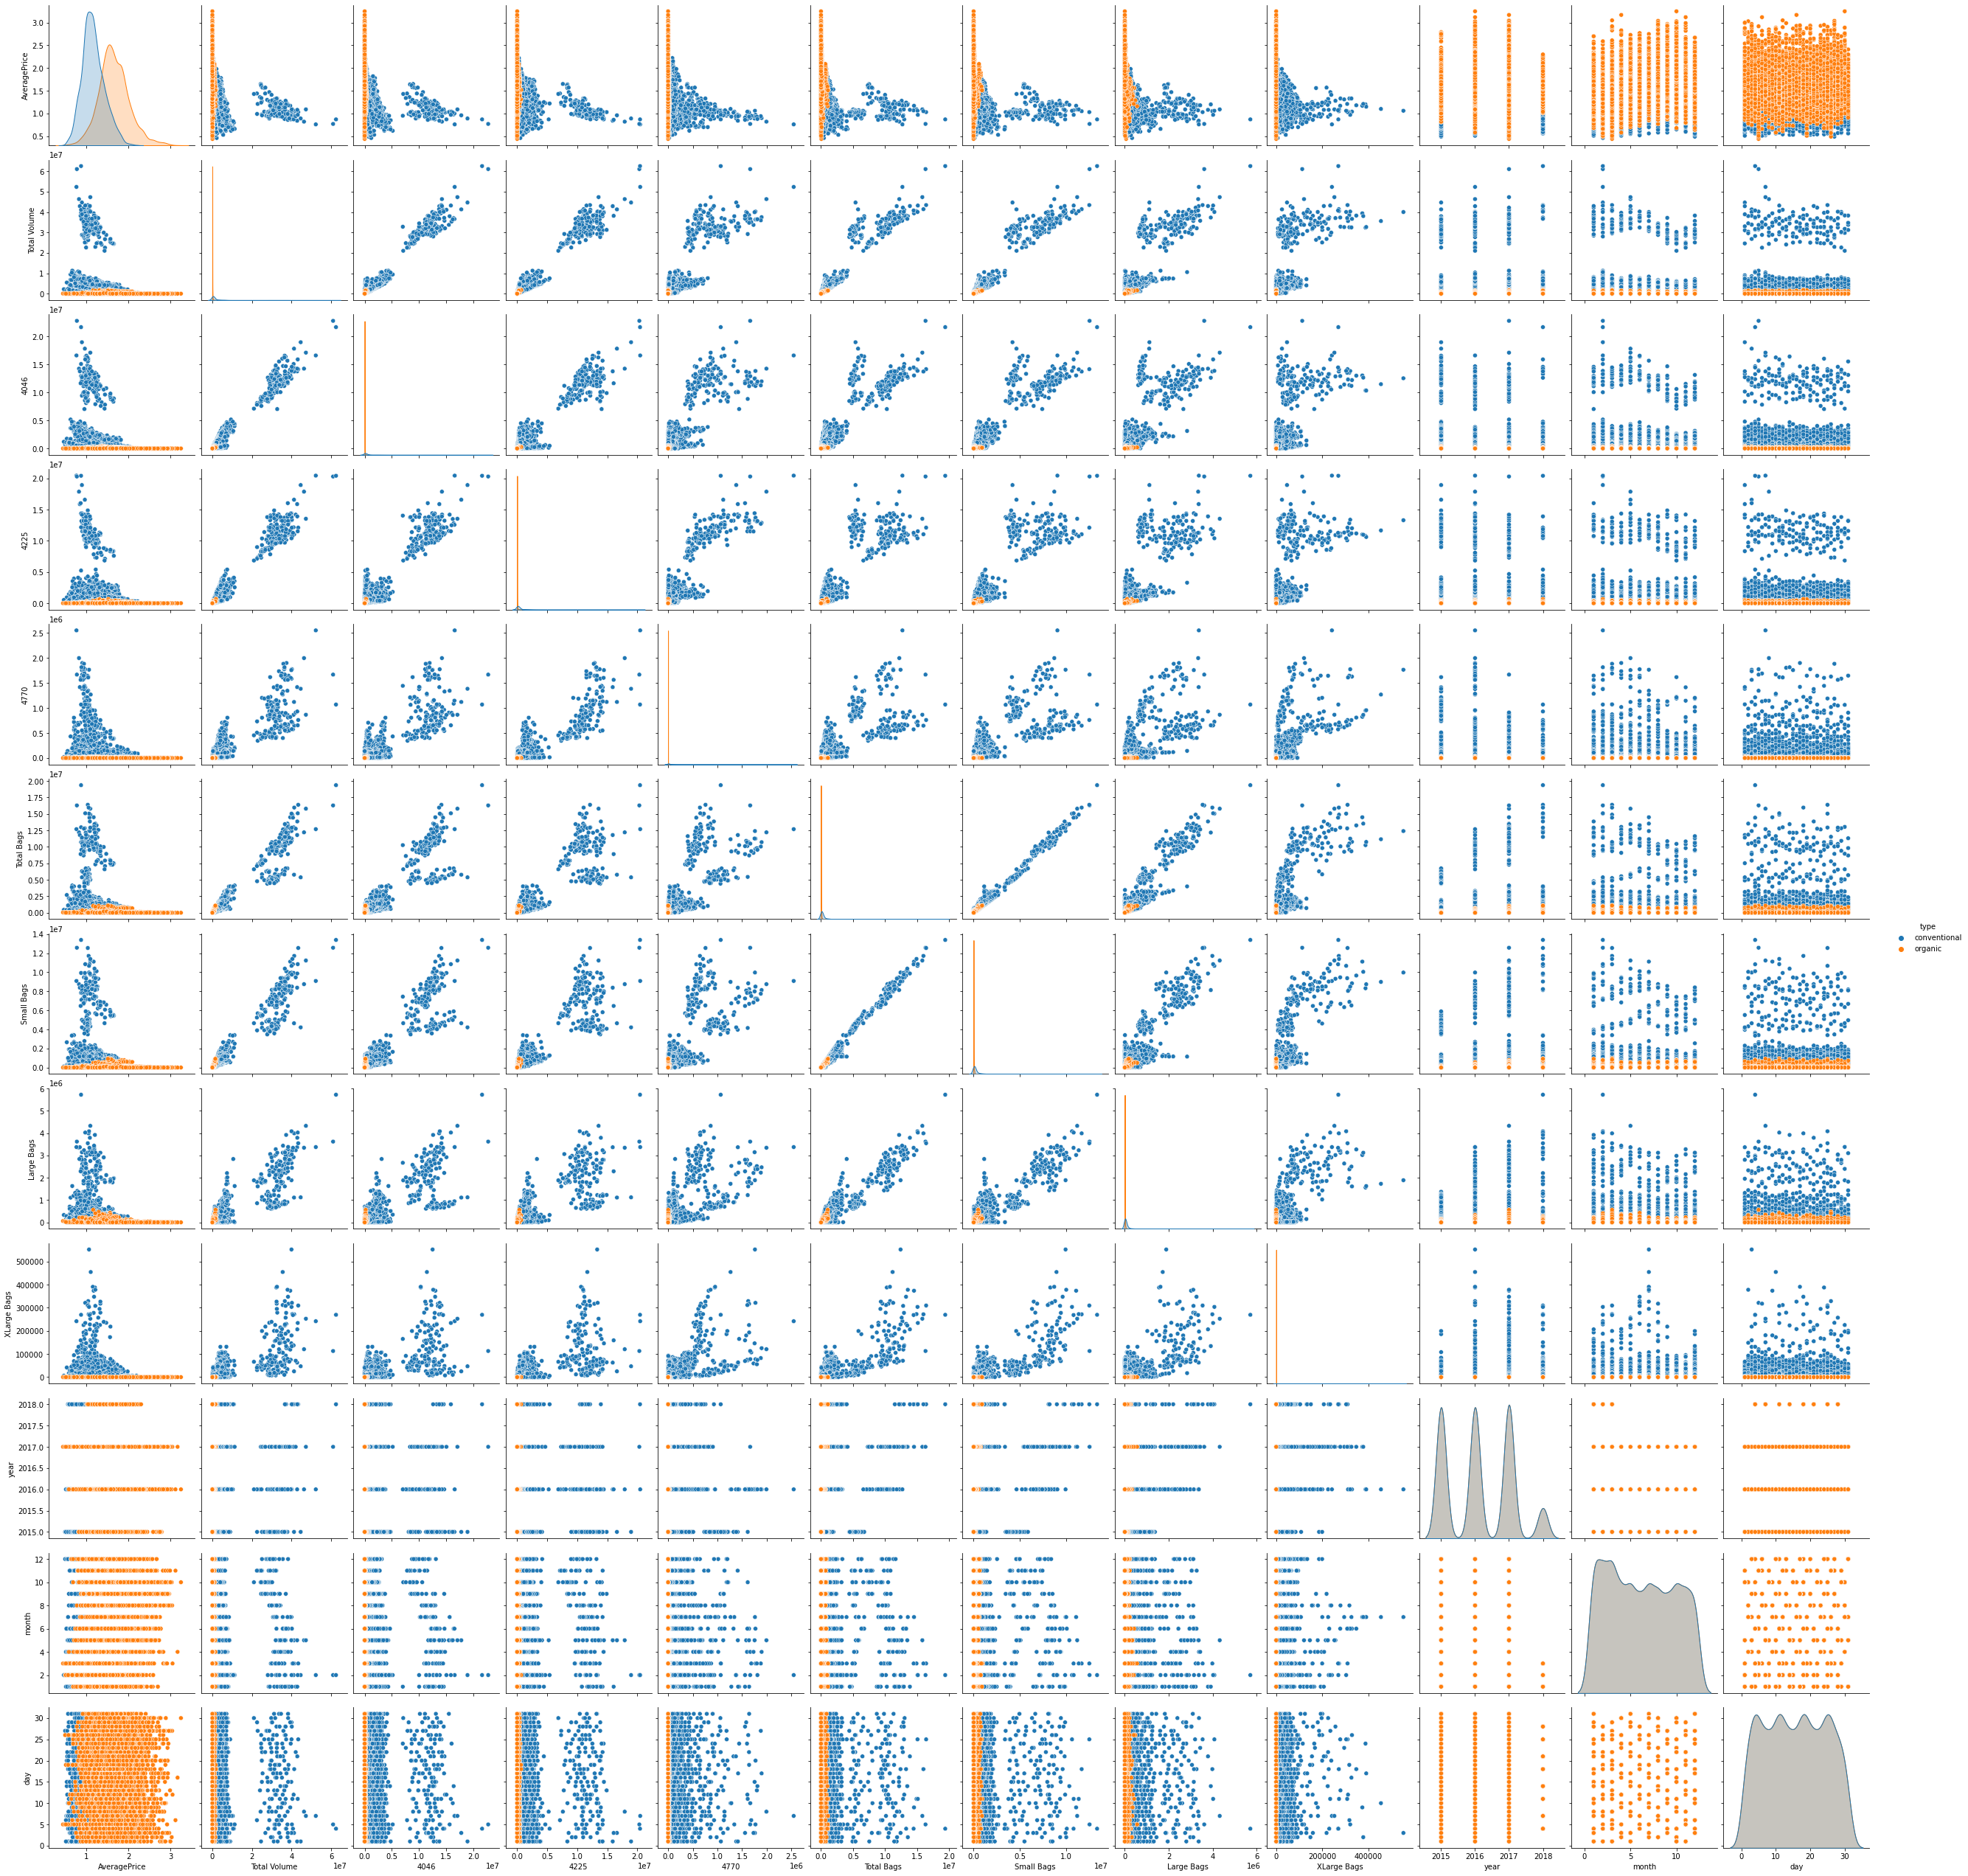

In [18]:
#Plot 1: Below plot shows the pair plots between all features Fiction or Non-Fiction
plt.figure(figsize=(20,15))
sns.pairplot(avocado, hue='type', height=3);

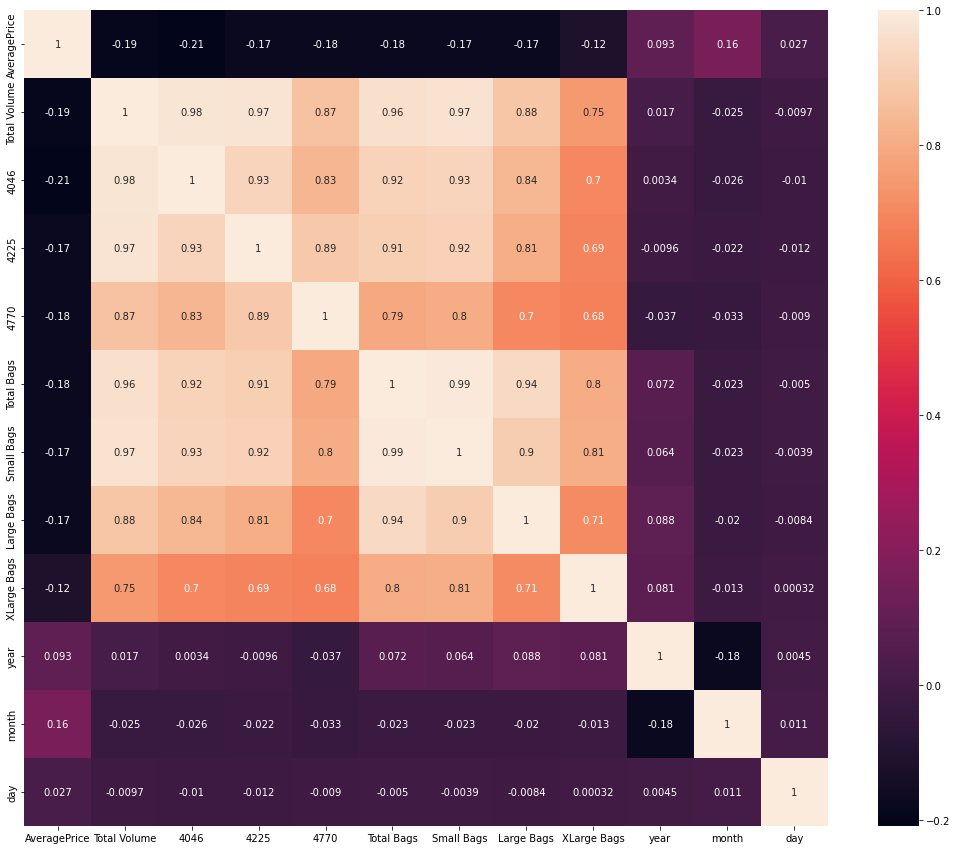

In [19]:
plt.figure(figsize=(18,15))
sns.heatmap(avocado.corr(),annot=True);

> ## Type

In [20]:
avocado.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

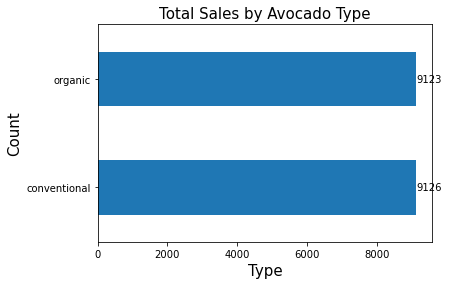

In [21]:
a=avocado['type'].value_counts().plot(kind = 'barh')
a.bar_label(a.containers[0])

#xlabel
plt.xlabel("Type", fontsize=15);

#ylabel
plt.ylabel("Count", fontsize=15);

#title
plt.title("Total Sales by Avocado Type", fontsize=15);


>> **Of the 18249 avocado sales, 9126 are Non-conventional avocados and 9123 are organic. Both avocado types contibute to 50% of the revenue with a slight difference of 0.02%.**

> ## Year of Sales

In [22]:
avocado.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

> ## Let's look at yearly total avocado sales

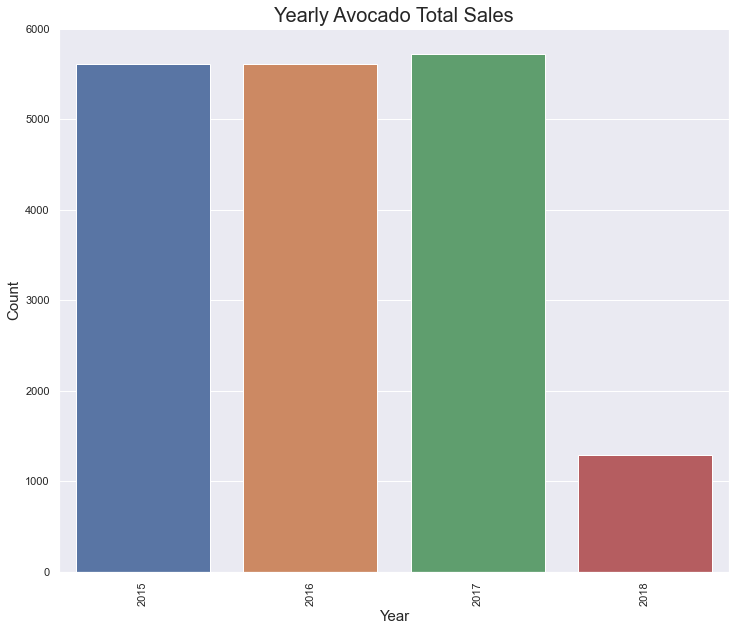

In [36]:
plt.figure(figsize=(12, 10))
b=sns.countplot(x="year", data=avocado)
#               order = avocado.groupby(by=['year'])['Total Volume'].count().sort_values(ascending=True).index)
b.bar_label(a.containers[0])
plt.xticks(rotation=90);
plt.xlabel('Year', fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Yearly Avocado Total Sales", fontsize=20);

>> **2017 had the highest sales with 5722 avocados sold (31.4%) followed by 2016 which contributed to 30.8% of the total sales. 2015 is the third with 5615 sales. This is 1 avocado less than 2016. 2018 has the lowest counts with 1296 sales (7.1%)**

> ## Let's see the total sales made per year by avocado

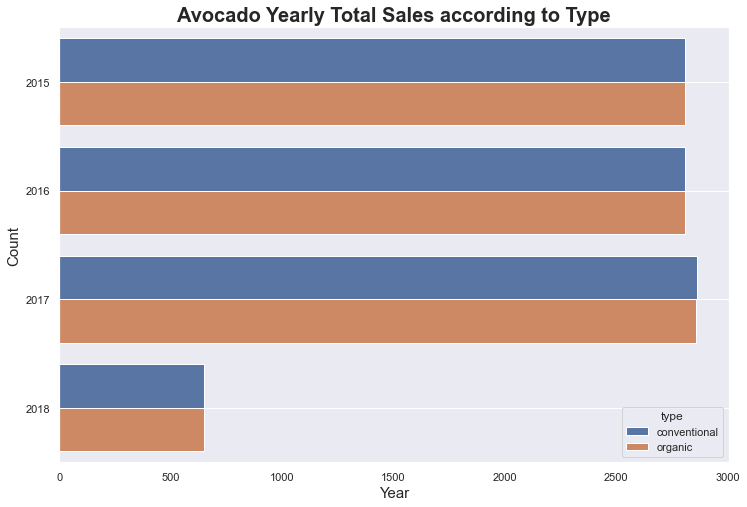

In [38]:
plt.figure(figsize = (12, 8))
sns.set()
sns.countplot(y = avocado.year, hue = avocado.type)
plt.grid()
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title('Avocado Yearly Total Sales according to Type', fontsize=20, weight="bold");

**2017 is the leading year with the highest sales in both avocado types while 2018 recorded the lowest sales in conventional and organic avocado types**

> ## Let's look at the the monthly sales

In [44]:
avocado.month.value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64

In [45]:
# convert day_name column to the name of the days that received the calls
avocado['month_name']=avocado['Date'].dt.month_name()
avocado['month_name'].unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January'],
      dtype=object)

In [32]:
avocado.month_name.value_counts()

January      1944
March        1836
February     1728
October      1512
July         1512
May          1512
November     1404
August       1404
April        1404
December     1403
September    1296
June         1294
Name: month_name, dtype: int64

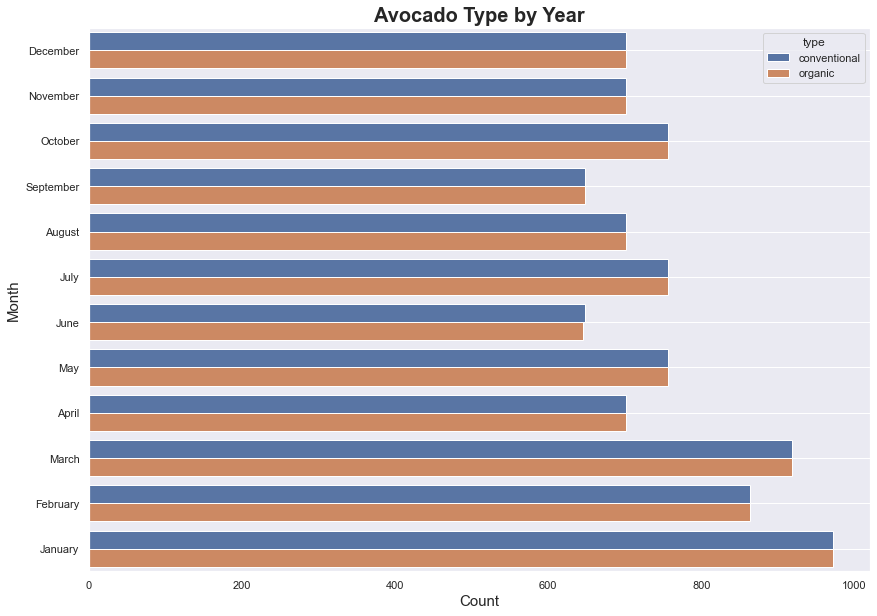

In [46]:
plt.figure(figsize = (14, 10))
sns.set()
sns.countplot(y = avocado.month_name, hue = avocado.type)
plt.grid()
plt.xlabel("Count", fontsize=15)
plt.ylabel("Month", fontsize=15)
plt.title("Avocado Type by Year", fontsize=20, weight="bold");

**The month of January has the highest sales of 1944 followed by March (1836). June, however, has the lowest sales of 1294**

> ## Price Analysis

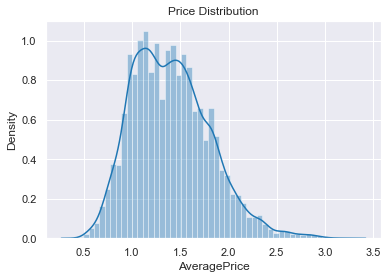

In [28]:
color_palette = sns.color_palette("tab10",  n_colors=5)
sns.distplot(avocado['AveragePrice'], color=color_palette[0]);
plt.title("Price Distribution");

In [29]:
def label_encoder_pre(data):
    if data.dtype == 'object':
        data = LabelEncoder().fit_transform(data)
    return data

In [30]:
scatter = go.Scatter(x = avocado.groupby('Date').mean().index, 
                     y = avocado.groupby('Date').mean().AveragePrice)

layout = go.Layout(title = 'Time series plot for mean daily prices for all regions', 
                   xaxis ={'title':'Date'}, 
                   yaxis = {'title':'Prices'})

figure = go.Figure(data = [scatter], layout = layout)
iplot(figure)

> ## Average price of avocados over the years for different types

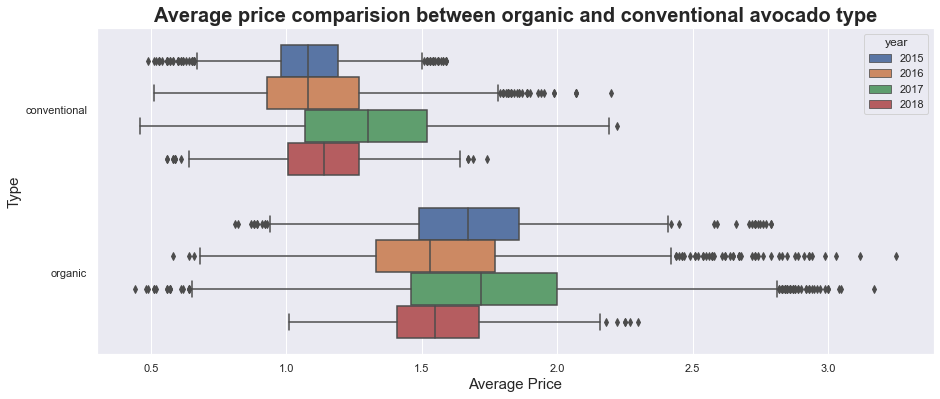

In [60]:
plt.figure(figsize=(15,6))
boxplot=sns.boxplot(avocado.AveragePrice,avocado.type,hue=avocado.year)
boxplot.set_title('Average price comparision between organic and conventional avocado type', fontsize=20, weight="bold")
boxplot.set_xlabel("Average Price", fontsize=15)
boxplot.set_ylabel("Type", fontsize=15)
plt.show()

**Organic Type has a higher average price while Conventional type is more affordable.**

**It's only in 2015 and 2015 that the average price of the conventional type are the same. For the organic type, 2015 has a higher average price than in 2016.**

> ## Average prices by type over the years

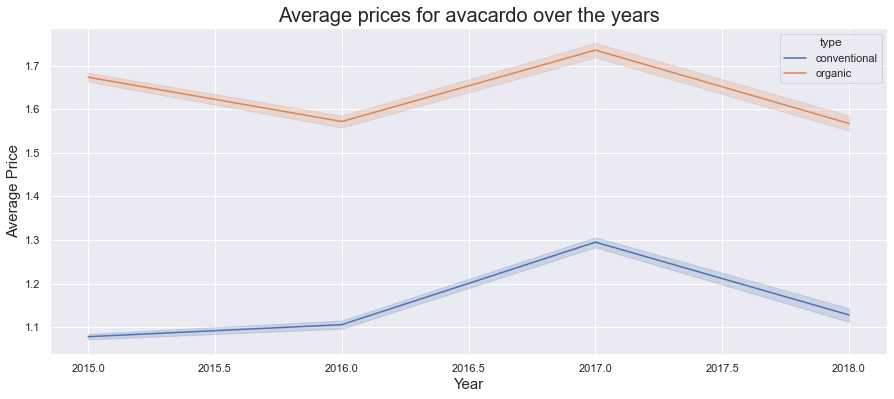

In [101]:
plt.figure(figsize=(15,6))
sns.lineplot(avocado.year,avocado.AveragePrice,hue=avocado.type)


plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Price", fontsize=15)
plt.title("Average prices for avocado over the years", fontsize=20);

**From 2016 to 2018, both types have a similar price trend where there is an increase in average price from 2016 to 2017 then decreased in 2018.**

**However, from 2015 to 2016, there is a decrease in the average price for the organic type while there was a slight increas with the conventional type**

> ## Region

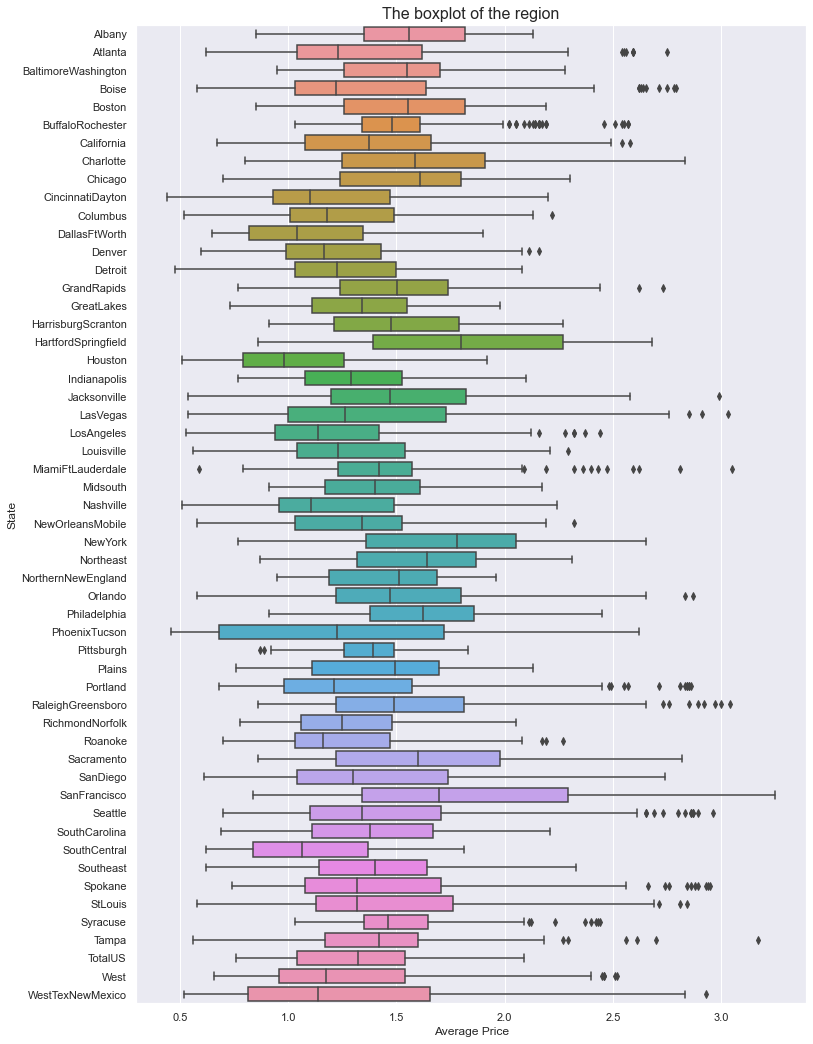

In [52]:
plt.figure(figsize = (12, 18))
ax = sns.boxplot(y = 'region', x = 'AveragePrice', data = avocado)
plt.xlabel("Average Price")
plt.ylabel("State")
plt.title('The boxplot of the regions', fontsize = 16);

**The top 3 states have the highest average prices are San Francisco, New York and Hartford Spring Field**

> ## Variation in ***Conventional*** avocado prices across different cities

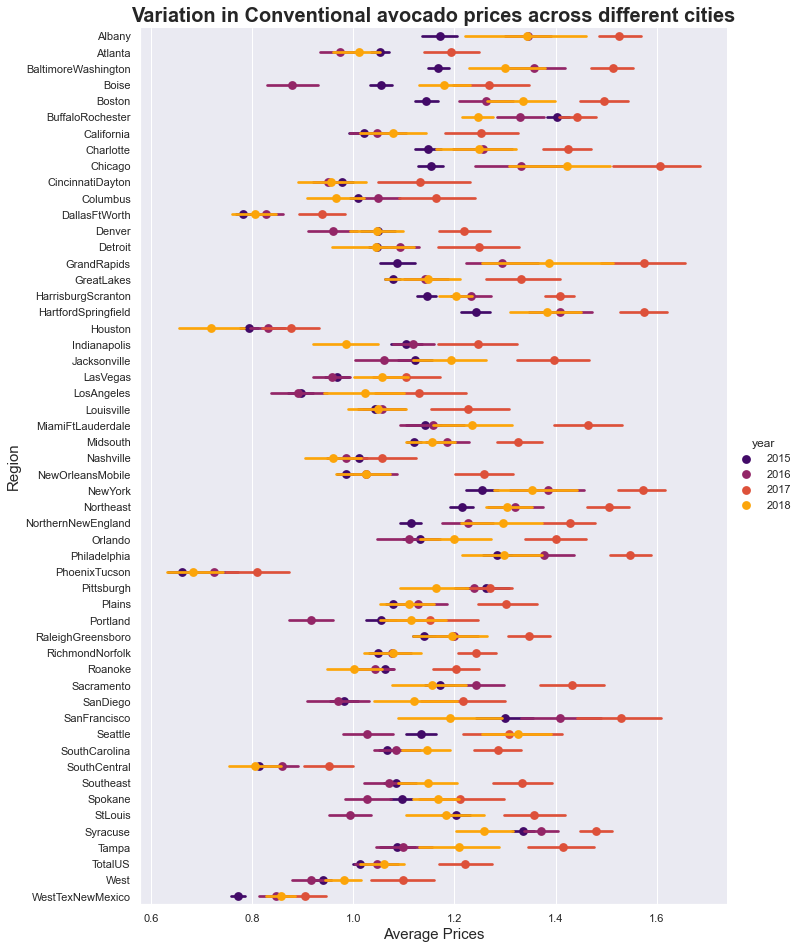

In [96]:

sns.factorplot('AveragePrice','region',data=avocado[avocado['type']=='conventional'],
                          join=False,size=13,
                          aspect=0.8,
                          palette='inferno',
                          hue='year')

plt.title('Variation in Conventional avocado prices across different cities', fontsize=20, weight="bold")
plt.xlabel("Average Prices", fontsize=15)
plt.ylabel("Region", fontsize=15);


**2017 has the highest average in all the regions**

> ## Variation in ***Organic*** avocado prices across different cities

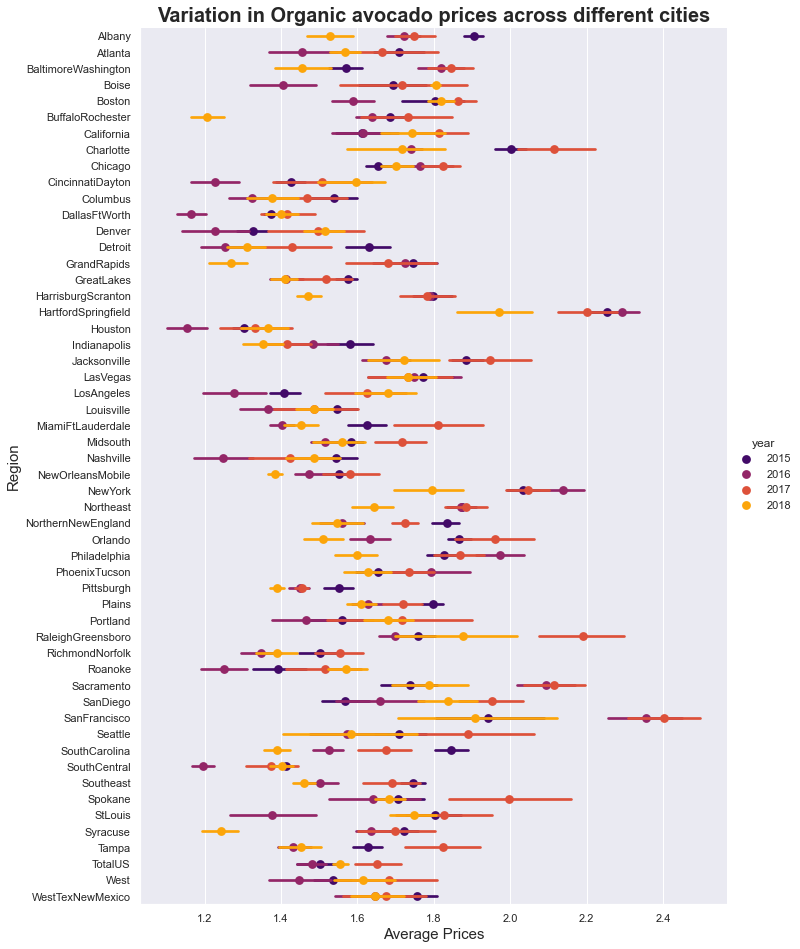

In [98]:

sns.factorplot('AveragePrice','region',data=avocado[avocado['type']=='organic'],
                          join=False,size=13,
                          aspect=0.8,
                          palette='inferno',
                          hue='year')

plt.title('Variation in Organic avocado prices across different cities', fontsize=20, weight="bold")
plt.xlabel("Average Prices", fontsize=15)
plt.ylabel("Region", fontsize=15);

**In contrary to what we've observed with conventional avocado type, the organic avocado type data shows that 2017 isn't consistent at being the leading average price across all regions; only 48% of the regions, followed by 36% of the regions that have 2015 with the highest average price. 6% of the regions have 2016 with the highest average price.**

**10% of the regions have 2018 with the highest average price.**

Let's group these regions by global region:

- SW - Southwest
- SE - Southeast
- W - West
- NE - Northeast
- MW - Midwest

In [102]:
region_dict = {
    'PhoenixTucson': 'SW',
    'Louisville': 'SE',
    'Midsouth': 'SE', 
    'SouthCarolina': 'SE', 
    'HartfordSpringfield': 'MW',
    'Tampa': 'SE', 
    'LasVegas': 'SW', 
    'LosAngeles': 'W', 
    'GrandRapids': 'MW', 
    'SouthCentral': 'MW', 
    'Philadelphia': 'NE', 
    'Denver': 'W', 
    'MiamiFtLauderdale': 'SE',
    'Houston': 'SW', 
    'NorthernNewEngland': 'NE',
    'Portland': 'W',
    'California': 'W',
    'Chicago': 'MW',
    'SanFrancisco': 'W',
    'NewOrleansMobile': 'SE',
    'HarrisburgScranton': 'NE', 
    'BaltimoreWashington': 'NE', 
    'Roanoke': 'SE', 
    'Northeast': 'MW', 
    'BuffaloRochester': 'MW', 
    'Syracuse': 'NE', 
    'Pittsburgh': 'NE', 
    'Seattle': 'W', 
    'Atlanta': 'W', 
    'Jacksonville': 'SE',
    'GreatLakes': 'MW', 
    'RaleighGreensboro': 'SE',
    'Indianapolis': 'MW', 
    'Nashville': 'SE',
    'SanDiego': 'W', 
    'Charlotte': 'SE',
    'Spokane': 'W', 
    'Albany': 'SE', 
    'Columbus': 'SE',
    'NewYork': 'NE', 
    'Sacramento': 'W',
    'StLouis': 'MW', 
    'West': 'SW', 
    'Southeast': 'SE',
    'TotalUS': 'NE',  #total us??? maybe it should be add in NE group
    'RichmondNorfolk': 'SE', 
    'Boise': 'W', 
    'Boston': 'NE', 
    'CincinnatiDayton': 'MW', 
    'Orlando': 'SE', 
    'Detroit': 'MW',
    'DallasFtWorth': 'SW',
    'Plains': 'SW', 
    'WestTexNewMexico': 'SW'
}

In [108]:
avocado['Region Group'] = avocado['region'].map(lambda region_label : region_dict[region_label])
avocado['Region Group'].unique()

array(['SE', 'W', 'NE', 'MW', 'SW'], dtype=object)

> ## Average Price by Global Region

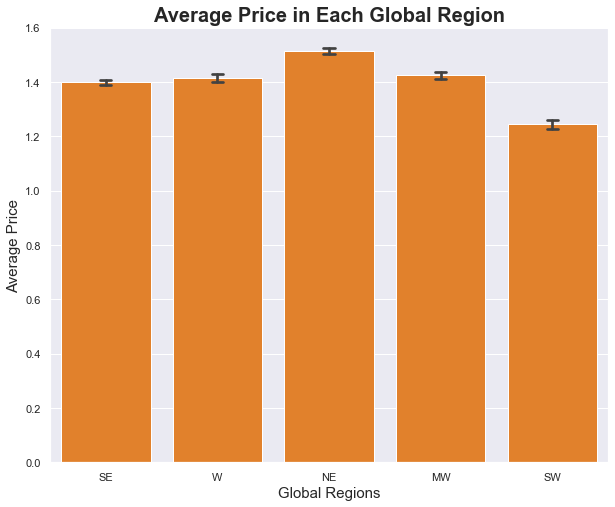

In [112]:
plt.figure(figsize=(10,8))
sns.barplot(
    data=avocado,
    capsize=0.1,
    x='Region Group', 
    y='AveragePrice', 
    color=color_palette[1])
plt.xlabel("Global Regions", fontsize=15)
plt.ylabel("Average Price", fontsize=15)
plt.title("Average Price in Each Global Region", fontsize=20, weight="bold");

> ## Price Elasticity

In [114]:
summarized = avocado[["Date", "region", "AveragePrice", "Total Volume"]].groupby(["Date", "region"]).mean().reset_index()

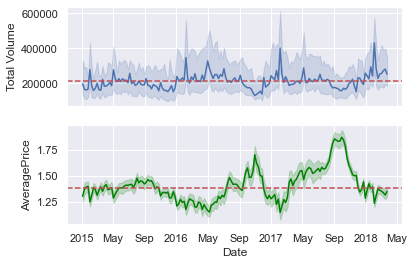

In [121]:
fig, (axd, axp) = plt.subplots(2, 1)
sns.lineplot(data=summarized, x="Date", y="Total Volume", estimator=np.median, ax=axd)
sns.lineplot(data=summarized, x="Date", y="AveragePrice", color="green", ax=axp)

axp.axhline(summarized["AveragePrice"].median(), ls="--", color="r")

axd.set_xticklabels([])
axd.set_xlabel('')
axp.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(axp.xaxis.get_major_locator()))
axd.axhline(summarized["Total Volume"].median(), ls="--", color="r");

**Comparing prices to demand over time shows negative correlations. Higher prices in September correlate with less Volume over the same season. Lower prices below median correlate with higher demand. Prices are generally similar across all regions and time. Regions differ considerably in value because of their sizes, but the distribution appears consistent within a 95\% confidence interval.**